In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

import dataset
import numbs
import backprop
import gp_backprop

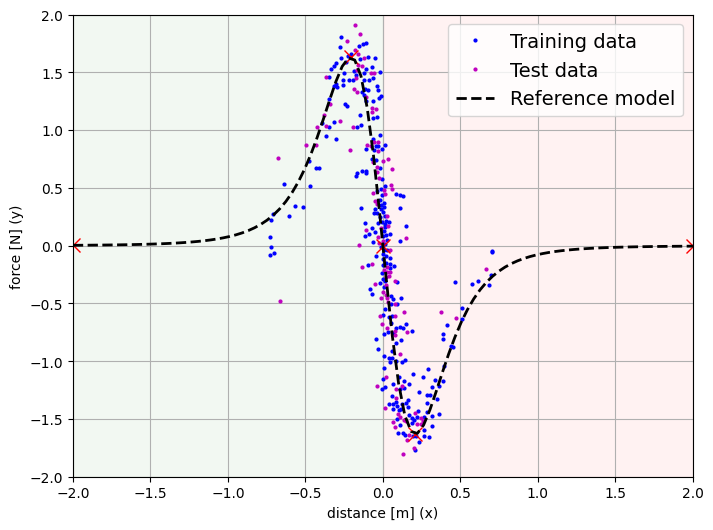

In [2]:
S = dataset.MagmanDatasetScaled()
#S.sample(size=250, noise=0.03, mesh=False)
S.load('../data/magman.csv')
S.split()
S.plot(width=8, height=6)

S.index()
numbs.init(S)

In [17]:
population = gp_backprop.random_population(popsize=1, max_depth=2)
best_stree, best_eval = gp_backprop.evaluate(population, S)

((A(x) / B(x)) * sqrt(C(x)))
--- ASP Model ---
sign_unkn("A","+",-4,-3) sign_unkn("A","+",-3,-2) sign_unkn("A","+",-2,-1) sign_unkn("A","+",-1,0) sign_unkn("A","-",0,1) sign_unkn("A","-",1,2) sign_unkn("A","-",2,3) sign_unkn("A","-",3,4) sign_unkn("B","+",-4,-3) sign_unkn("B","+",-3,-2) sign_unkn("B","+",-2,-1) sign_unkn("B","+",-1,0) sign_unkn("B","+",0,1) sign_unkn("B","+",1,2) sign_unkn("B","+",2,3) sign_unkn("B","+",3,4) sign_unkn("C","+",3,4) sign_unkn("C","+",2,3) sign_unkn("C","+",1,2) sign_unkn("C","+",0,1) sign_unkn("C","+",-1,0) sign_unkn("C","+",-2,-1) sign_unkn("C","+",-3,-2) sign_unkn("C","+",-4,-3) sign_unkn("A'","-",1,2) sign_unkn("A'","-",2,3) sign_unkn("A'","-",3,4) sign_unkn("A'","-",-4,-3) sign_unkn("A'","-",-3,-2) sign_unkn("A'","-",-2,-1) sign_unkn("A'","-",0,1) sign_unkn("A'","-",-1,0) sign_unkn("B'","-",1,2) sign_unkn("B'","-",2,3) sign_unkn("B'","-",3,4) sign_unkn("B'","+",-4,-3) sign_unkn("B'","+",-3,-2) sign_unkn("B'","+",-2,-1) sign_unkn("B'","-",0,1) sign_un

--- Best Syntax Tree ---
((A(x) / B(x)) * sqrt(C(x)))
Training
	mse: 0.40970930463249805
	rmse: 0.6400853885478859
	r2: 0.6088023592897271
Testing
	mse: 0.510527548595841
	rmse: 0.7145121052829273
	r2: 0.520055564442195
Knowledge
	mse: 0.2683103110408961
	rmse: 0.5179867865504835



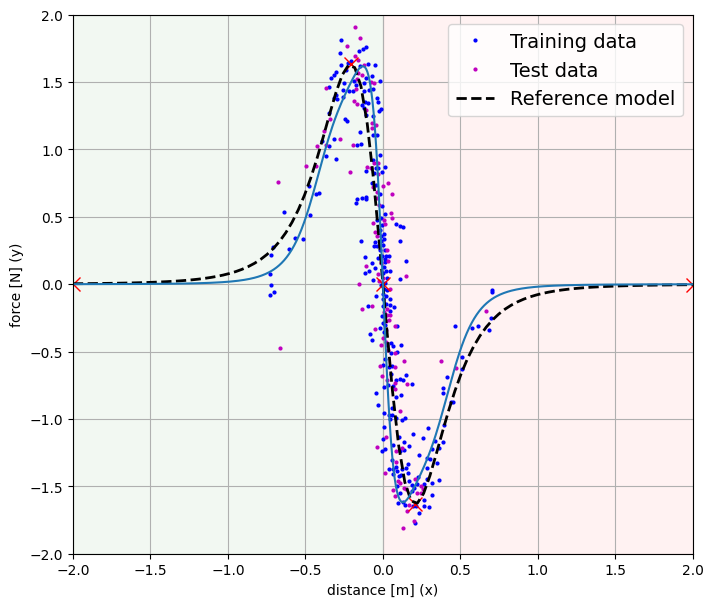

In [18]:
print("--- Best Syntax Tree ---")
print(best_stree)
print(best_eval)

if best_stree is not None:
    S.plot(width=8, height=7)
    xp = np.linspace(S.xl, S.xu, 500)
    plt.plot(xp, best_stree.compute_output(xp));
    plt.show()

In [19]:
if best_stree is not None:
    unkn_collector = backprop.UnknownSyntaxTreeCollector()
    best_stree.accept(unkn_collector)
    for unkn_label in unkn_collector.unknown_labels:
        print(f"{unkn_label}(x) =\n{best_stree.get_unknown_stree(unkn_label).model}\n")

C(x) =
            6             4             2
-8.635e-07 x + 2.723e-07 x - 5.237e-08 x + 0.8952

B(x) =
       6         4         2
120.8 x - 20.56 x + 5.162 x + 0.07184

A(x) =
            5
-1.505e-08 x - 2.023 x

